In [1]:
import music21
from music21.note import Note
from common import ANNOTATIONSCOREDUPLES
import seaborn as sns
import matplotlib.pyplot as plt
from annotation_parser import parseAnnotation
from score_parser import parseScore
import pandas as pd
pd.set_option('display.max_rows', 6000)

In [2]:
def getAnnotationOffsets(a):
    annotationIndexes = a[a.a_isOnset].a_pitchNames.index.to_list()
    annotationNotes = a[a.a_isOnset].a_pitchNames.to_list()
    annotationText = a[a.a_isOnset].a_romanNumeral.to_list()
    annotationIndexes.append('end')
    annotationRanges = [(annotationIndexes[i], annotationIndexes[i+1], annotationNotes[i], annotationText[i]) for i in range(len(annotationNotes))]
    return annotationRanges

def getBassPresence(annotationRanges, s):
    ret = []
    for start, end, annotationNotes, _ in annotationRanges:
#         print(start, end)
        if end == "end":
            slices = s[start:]
        else:
            slices = s[start:end].iloc[:-1]
        annotationBass = annotationNotes[0]
        scoreBasses = [Note(chord[0]).name for chord in slices.s_notes]
        counts = scoreBasses.count(annotationBass)
        inversionScore = 1.0 - counts/len(scoreBasses)
#         print(annotationBass, scoreBasses, inversionScore)
        ret.append(inversionScore)
    return ret

In [3]:
f = "bps-01-op002-no1-1"
aPath, sPath = ANNOTATIONSCOREDUPLES[f]

In [4]:
# aScore = music21.converter.parse(aPath, format="romantext").show("musicxml")
# sScore = music21.converter.parse(sPath).chordify().show("musicxml")

In [5]:
a = parseAnnotation(aPath)
s = parseScore(sPath)
annotationRanges = getAnnotationOffsets(a)
inversionMetrics = getBassPresence(annotationRanges, s)

In [6]:
qualitydfdict = {
    "start": [],
    "end": [],
    "romanNumeral": [],
    "annotationPitchNames": [],
    "inversionScore": []
}

for i in range(len(annotationRanges)):
    start, end, annotationPitchNames, romanNumeral = annotationRanges[i]
    inversionScore = inversionMetrics[i]
    qualitydfdict["start"].append(start)
    qualitydfdict["end"].append(end)
    qualitydfdict["romanNumeral"].append(romanNumeral)
    qualitydfdict["annotationPitchNames"].append(annotationPitchNames)
    qualitydfdict["inversionScore"].append(inversionScore)

In [7]:
qualitydf = pd.DataFrame(qualitydfdict)

In [8]:
qualitydf

,start,end,romanNumeral,annotationPitchNames,inversionScore
0,0.0,1.0,i,"(F, A-, C)",1.000000
1,1.0,5.0,i,"(F, A-, C)",0.500000
2,5.0,9.0,i,"(F, A-, C)",0.250000
3,9.0,13.0,V7,"(E, G, B-, C)",0.500000
4,13.0,17.0,V7,"(E, G, B-, C)",0.250000
5,17.0,21.0,i,"(F, A-, C)",0.250000
6,21.0,25.0,V7,"(G, B-, C, E)",0.250000
7,25.0,27.0,i,"(A-, C, F)",0.500000
8,27.0,29.0,iio,"(B-, D-, G)",0.250000
9,29.0,32.0,V,"(C, E, G)",0.333333


Top problematic annotations:


,start,end,romanNumeral,annotationPitchNames,inversionScore
0,0.0,1.0,i,"(F, A-, C)",1.0
10,32.0,33.0,iii,"(C, E-, G)",1.0
13,41.0,45.0,IV7,"(F, A-, C, D-)",1.0
73,192.0,193.0,I,"(A-, C, E-)",1.0
104,268.0,269.0,V7,"(G, B, D, F)",1.0
108,276.0,277.0,V7,"(F, A, C, E-)",1.0
112,284.0,285.0,V7,"(E-, G, B-, D-)",1.0
140,377.0,381.0,N,"(D-, G-, B-)",1.0
155,432.0,433.0,i,"(F, A-, C)",1.0
158,441.0,445.0,VI,"(G-, B-, D-)",1.0


(0.0, 1.01)

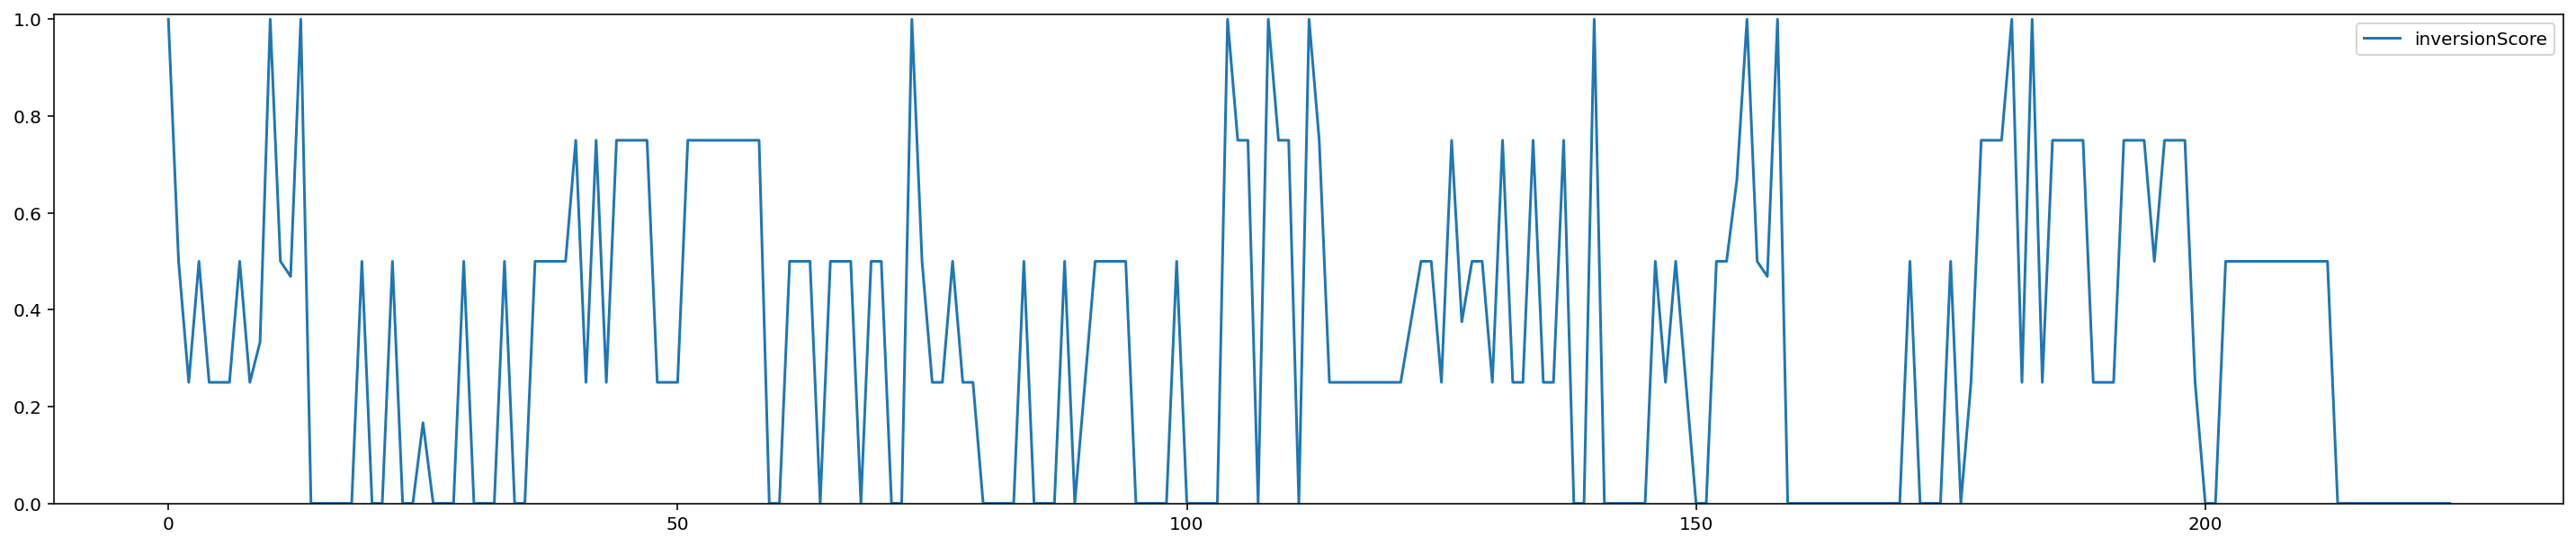

In [11]:
print("Top problematic annotations:")
display(qualitydf[qualitydf.inversionScore == 1.0])
plt.figure(figsize=(25, 5))
sns.lineplot(data=qualitydf[["inversionScore"]])
plt.ylim(0, 1.01)

<AxesSubplot:xlabel='romanNumeral', ylabel='inversionScore'>

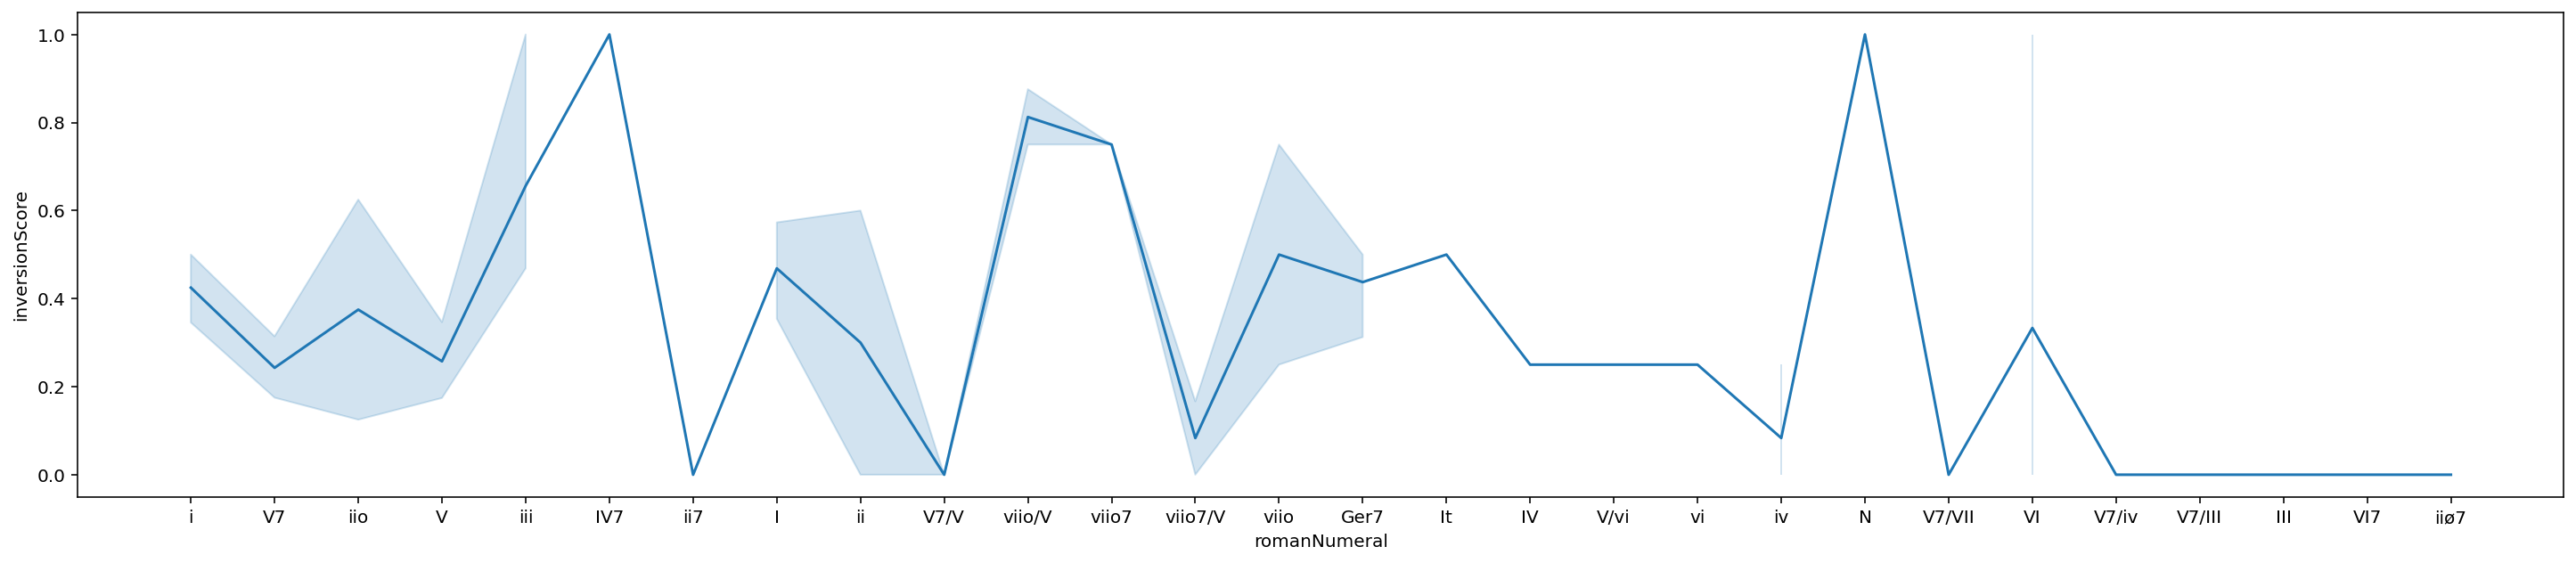

In [10]:
plt.figure(figsize=(25, 5))
sns.lineplot(data=qualitydf, x="romanNumeral", y="inversionScore")